<a href="https://colab.research.google.com/github/SharvaniKasam/Data-Analysis-Python/blob/main/Customer_Churn_Prediction_and_Prevention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('/content/Telecom_cust_churn.csv')

# New Section

**Understanding the Data**


In [117]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [118]:
df.shape

(7043, 21)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [120]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [121]:
df.describe(include=object).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


**Data Manipulation**

In [122]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [123]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [124]:
df=df.fillna(df['TotalCharges'].mean())
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [125]:
#removing duplicate data
df.duplicated().sum()

22

In [126]:
df.drop_duplicates(inplace=True)

In [127]:
df.duplicated().sum()

0

In [128]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [129]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [130]:
indices = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]
values = df.loc[indices, 'MonthlyCharges'].tolist()

print(values)


[52.55, 20.25, 80.85, 25.75, 56.05, 19.85, 25.35, 20.0, 19.7, 73.35, 61.9]


In [131]:
#we are dropping rows that have tenure value as zero by considering them as missing values as there are MonthlyCharges even with zero tenure

In [132]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)

**OUTLIER ANALYSIS**

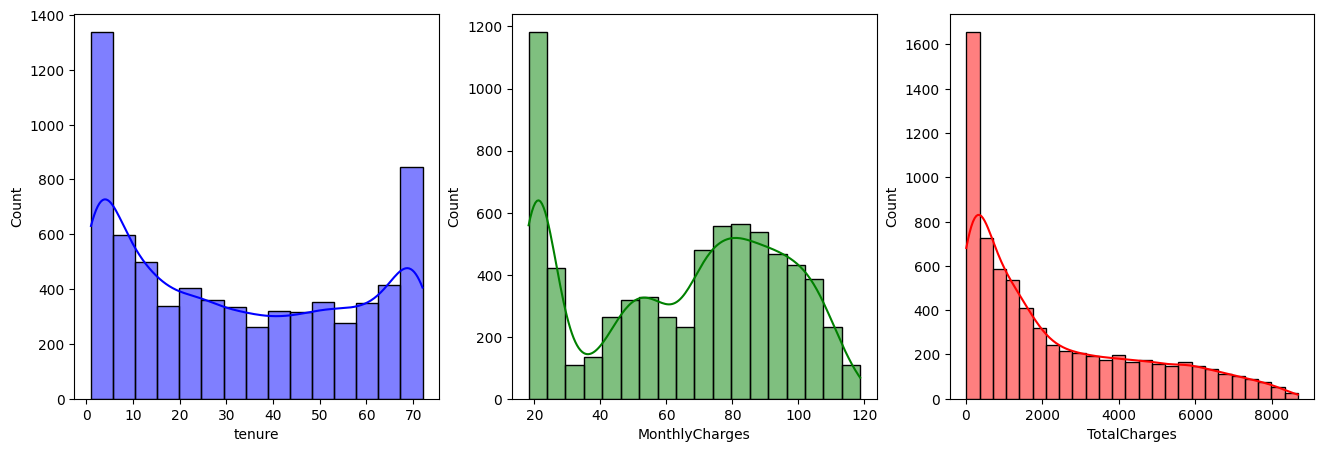

In [133]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.histplot(df['tenure'],kde=True,color='blue')
plt.subplot(1,3,2)
sns.histplot(df['MonthlyCharges'],kde=True,color='green')
plt.subplot(1,3,3)
sns.histplot(df['TotalCharges'],kde=True,color='red')
plt.show()

In [134]:
def detect_outliers(d):
  for i in d:
    Q3, Q1 = np.percentile(df[i], [75 ,25])
    IQR = Q3 - Q1

    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    outliers = df[i][(df[i] > ul) | (df[i] < ll)]
    print(f'* {i} outlier points***', '\n', outliers, '\n')
detect_outliers(['tenure', 'MonthlyCharges', 'TotalCharges'])

* tenure outlier points*** 
 Series([], Name: tenure, dtype: int64) 

* MonthlyCharges outlier points*** 
 Series([], Name: MonthlyCharges, dtype: float64) 

* TotalCharges outlier points*** 
 Series([], Name: TotalCharges, dtype: float64) 



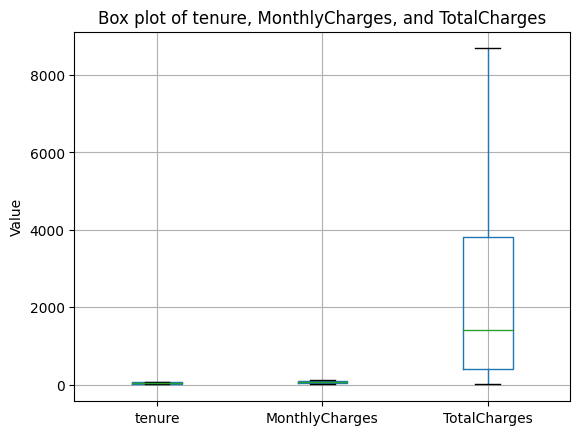

In [135]:
df.boxplot(column=['tenure', 'MonthlyCharges', 'TotalCharges'])
plt.title('Box plot of tenure, MonthlyCharges, and TotalCharges')
plt.ylabel('Value')
plt.show()

In [136]:
# no outliers are seen

**Data Visualization**

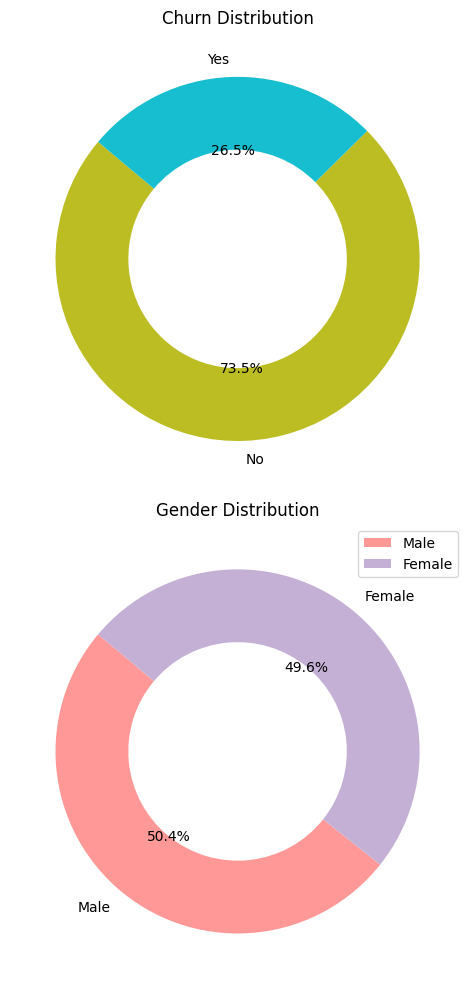

In [137]:
# Calculate the counts for 'Churn' and 'gender'
churn_counts = df['Churn'].value_counts()
gender_counts = df['gender'].value_counts()

# Define colors for the pie charts
colors_churn = ['#bcbd22', '#17becf']
colors_gender = ['#ff9896', '#c5b0d5']

# Set up the figure
plt.figure(figsize=(8, 10))

# Plot the first donut chart for 'Churn'
plt.subplot(2, 1, 1)  # (rows, columns, position)
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140, colors=colors_churn, wedgeprops=dict(width=0.4))
plt.title('Churn Distribution')

# Plot the second donut chart for 'Gender'
plt.subplot(2, 1, 2)  # (rows, columns, position)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors_gender, wedgeprops=dict(width=0.4))
plt.title('Gender Distribution')

# Add a legend and display the plots
plt.legend()
plt.tight_layout()
plt.show()

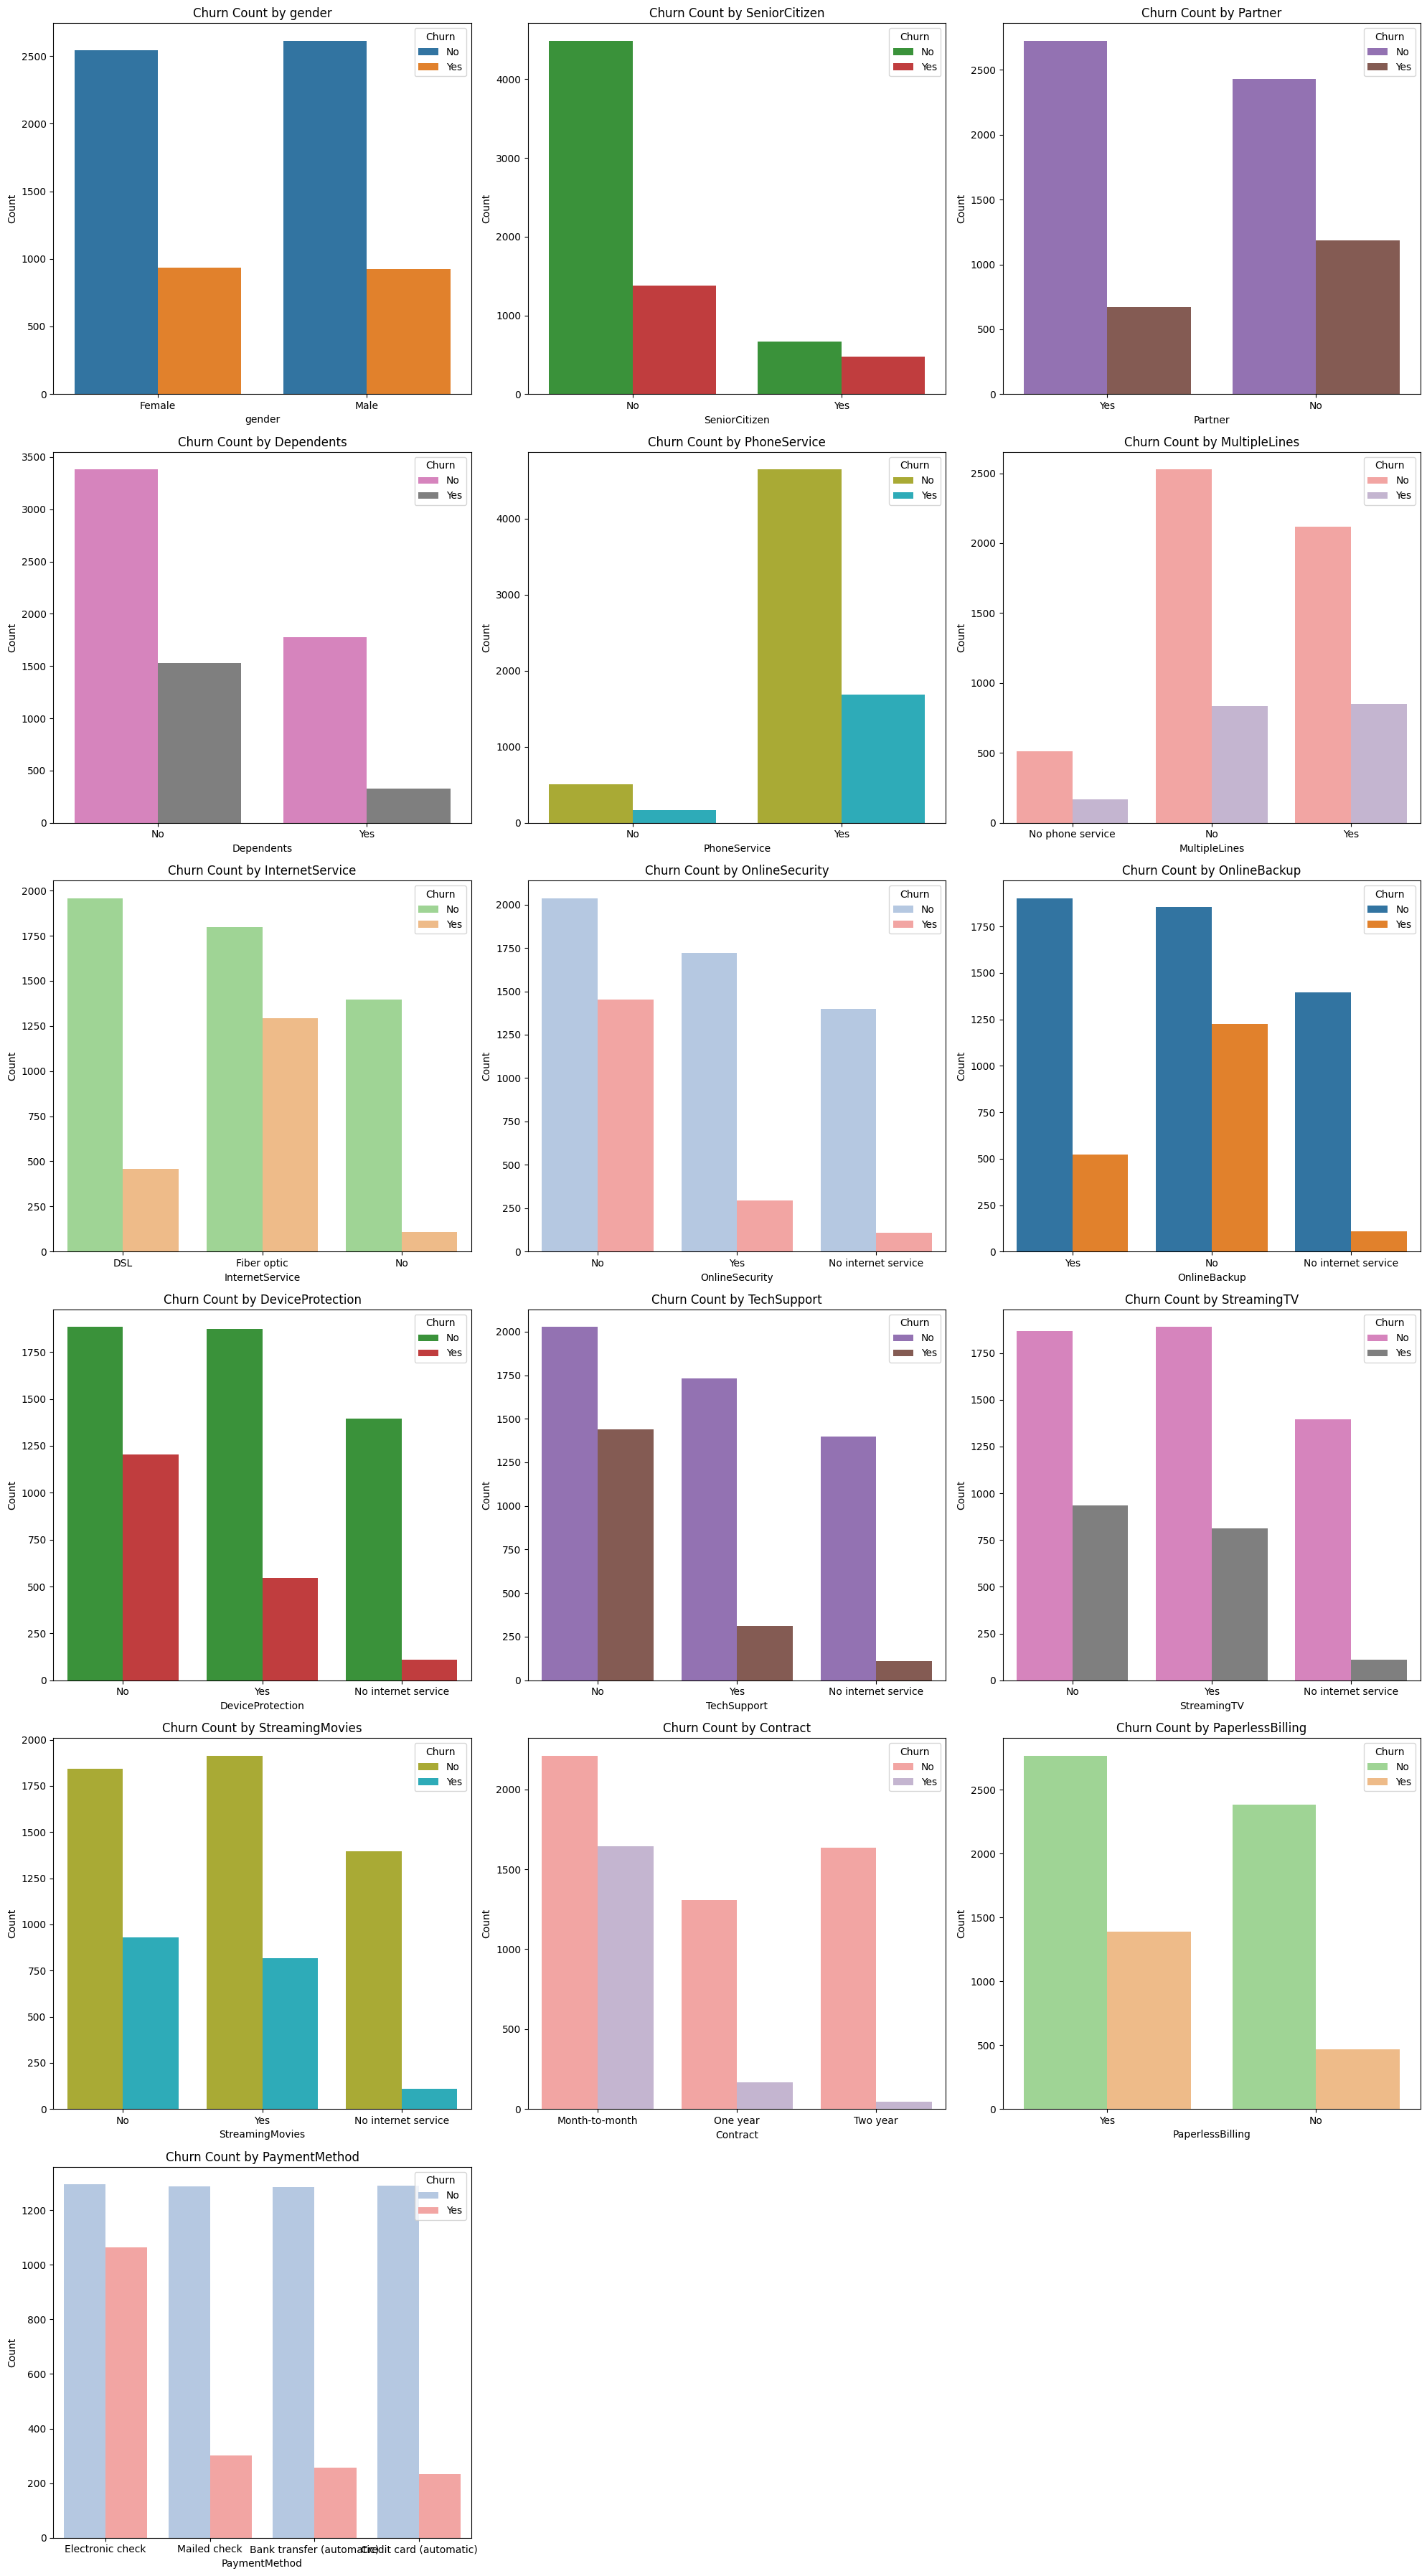

In [138]:


import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
# df = pd.read_csv('your_churn_data.csv')

# List of columns to plot against 'Churn'
columns_to_plot = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                   'PaymentMethod']

# Determine the number of rows and columns for the subplots grid
num_plots = len(columns_to_plot)
num_cols = 3  # Number of columns for the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define a set of contrasting color pairs
color_pairs = [
    ['#1f77b4', '#ff7f0e'],  # Blue and Orange
    ['#2ca02c', '#d62728'],  # Green and Red
    ['#9467bd', '#8c564b'],  # Purple and Brown
    ['#e377c2', '#7f7f7f'],  # Pink and Gray
    ['#bcbd22', '#17becf'],  # Olive and Cyan
    ['#ff9896', '#c5b0d5'],  # Light Red and Lavender
    ['#98df8a', '#ffbb78'],  # Light Green and Light Orange
    ['#aec7e8', '#ff9896'],  # Light Blue and Light Red
]

# Create count plots for each column against 'Churn'
for idx, column in enumerate(columns_to_plot):
    color_pair = color_pairs[idx % len(color_pairs)]
    sns.countplot(ax=axes[idx], x=column, hue='Churn', data=df, palette=color_pair)  # Use contrasting color pairs
    axes[idx].set_title(f'Churn Count by {column}')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Count')
    axes[idx].legend(title='Churn')

# Remove any unused subplots
for ax in axes[num_plots:]:
    ax.remove()

plt.tight_layout()
plt.show()

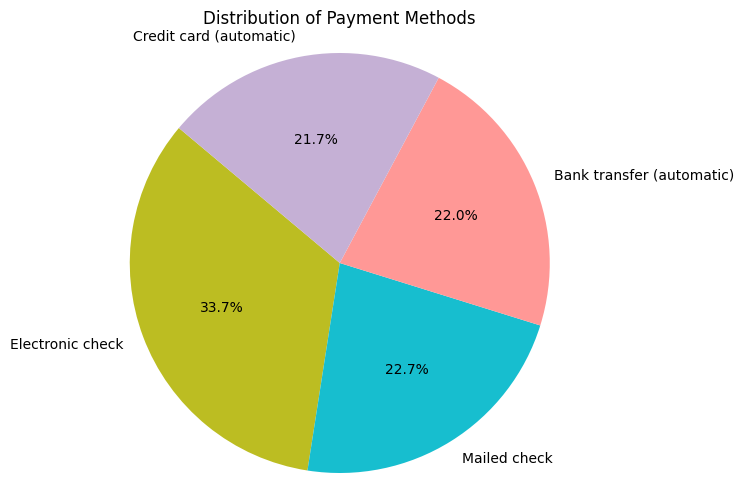

In [139]:
import matplotlib.pyplot as plt

# Calculate the counts of each payment method
payment_counts = df['PaymentMethod'].value_counts()
color_pairs = ['#bcbd22', '#17becf', '#ff9896', '#c5b0d5']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=color_pairs)
plt.title('Distribution of Payment Methods')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()



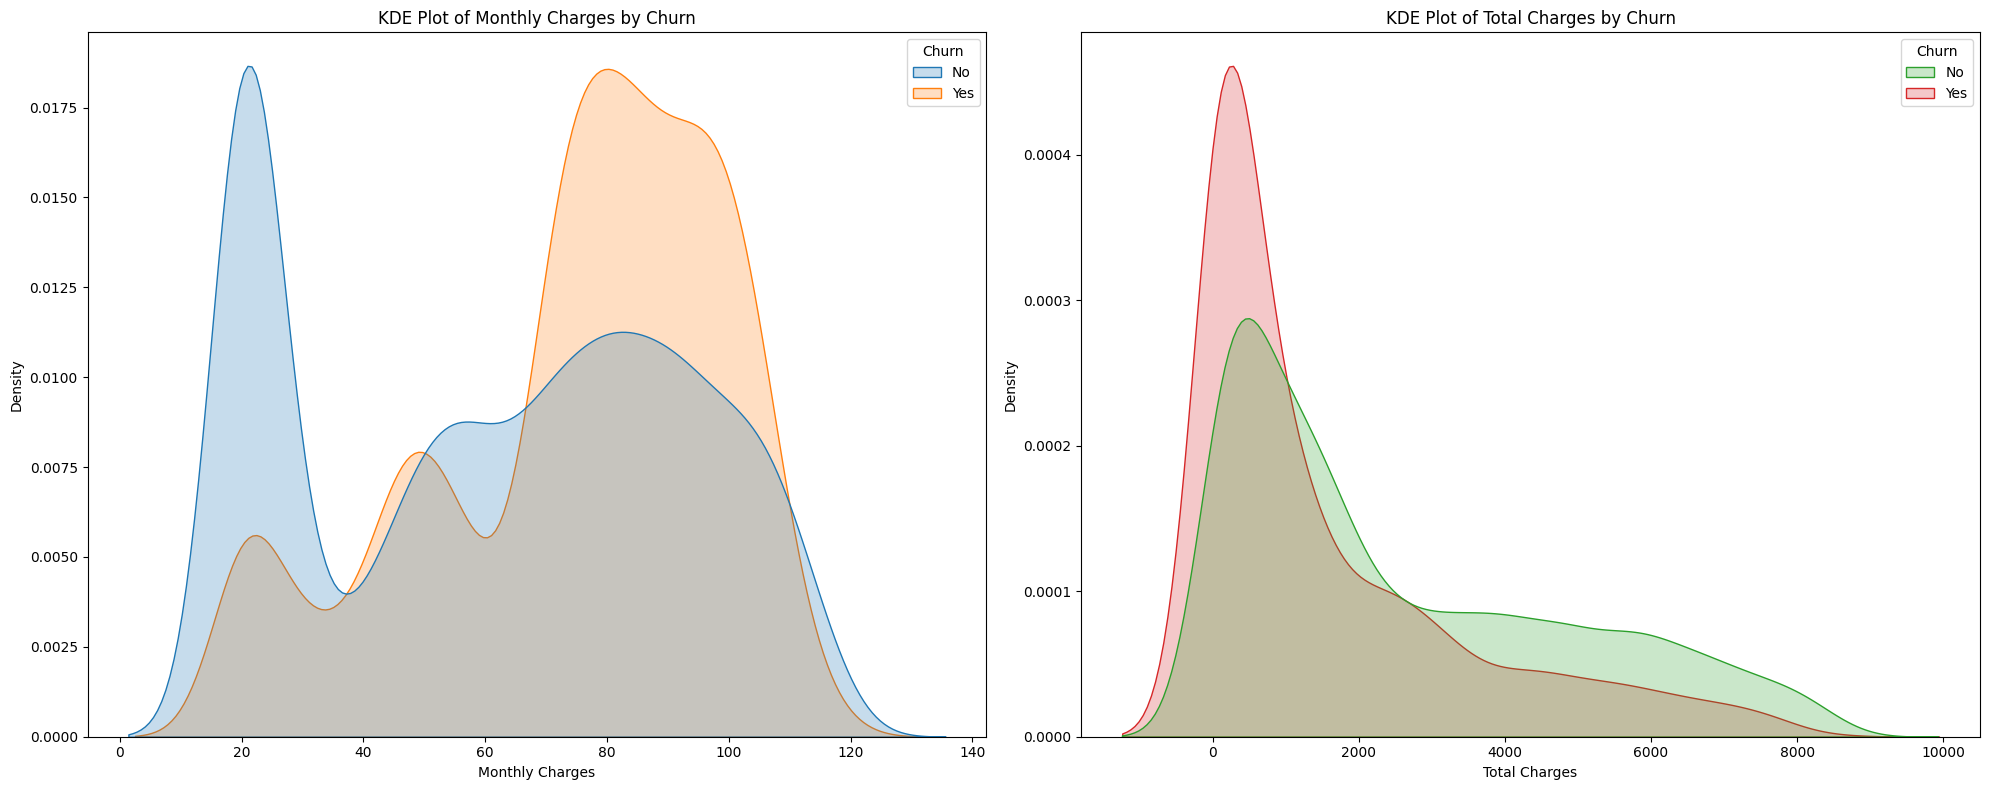

In [140]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.kdeplot(ax=axes[0], data=df, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False, palette=['#1f77b4', '#ff7f0e'])
axes[0].set_title('KDE Plot of Monthly Charges by Churn')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Density')

# KDE plot for TotalCharges
sns.kdeplot(ax=axes[1], data=df, x='TotalCharges', hue='Churn', fill=True, common_norm=False, palette=['#2ca02c', '#d62728'])
axes[1].set_title('KDE Plot of Total Charges by Churn')
axes[1].set_xlabel('Total Charges')
axes[1].set_ylabel('Density')
plt.tight_layout()
plt.show()

<ipython-input-141-0ec25a895dcf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette=['#1f77b4', '#ff7f0e'])


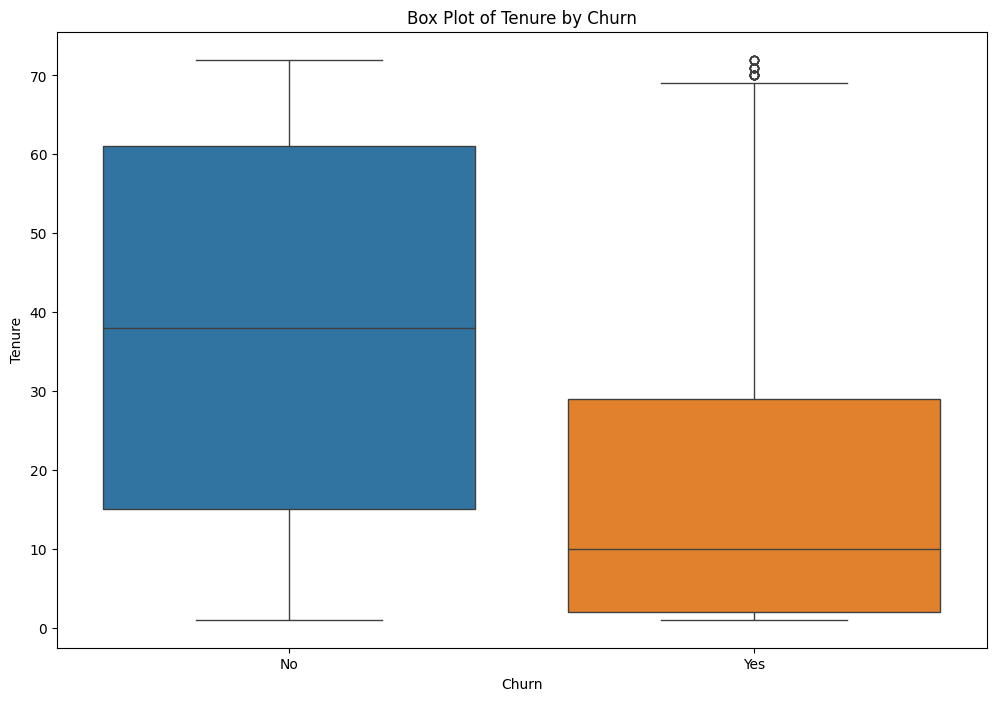

In [141]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Churn', y='tenure', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Box Plot of Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

DATA PREPROCESSING

In [142]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [143]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [144]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [145]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.30, random_state = 40)

MODELING AND PARAMETER OPTIMIZATION

In [146]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


In [147]:
results = {
    'Model': [],
    'Avg Score': [],
}

Logistic Regression

Logistic Regression
Cross-Validation Scores: [0.79837067 0.79531568 0.79816514 0.80530071 0.80530071]
avg Cross-Validation Score: 0.8004905838217372
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1548
           1       0.65      0.58      0.62       555

    accuracy                           0.81      2103
   macro avg       0.75      0.74      0.74      2103
weighted avg       0.80      0.81      0.80      2103



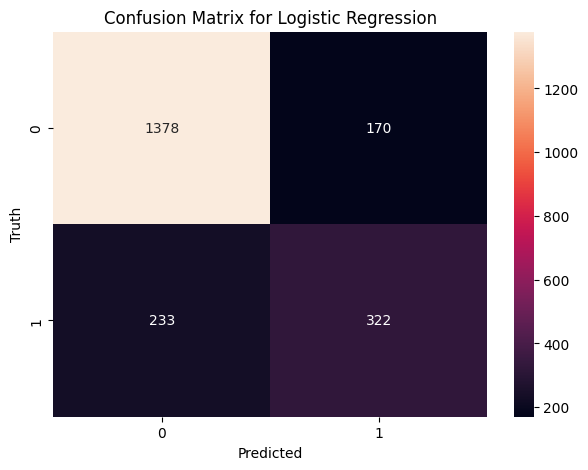

In [148]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Cross-validation scores
lr_cv_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_avg_score = np.average(lr_cv_scores)

# Predictions and evaluation
y_pred_lr = lr.predict(X_test)
lr_classification_report = classification_report(y_test, y_pred_lr)
cm = confusion_matrix(y_test, y_pred_lr)

# Print results
print("Logistic Regression")
print("Cross-Validation Scores:", lr_cv_scores)
print("avg Cross-Validation Score:", lr_avg_score)
print("Classification Report:\n", lr_classification_report)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Logistic Regression')

# Store results
results['Model'].append('Logistic Regression')
results['Avg Score'].append(lr_avg_score)

 SVM

SVM
Cross-Validation Scores: [0.79633401 0.78615071 0.79001019 0.78593272 0.78797146]
Average Cross-Validation Score: 0.7892798196279204
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1548
           1       0.68      0.51      0.58       555

    accuracy                           0.81      2103
   macro avg       0.76      0.71      0.73      2103
weighted avg       0.80      0.81      0.80      2103



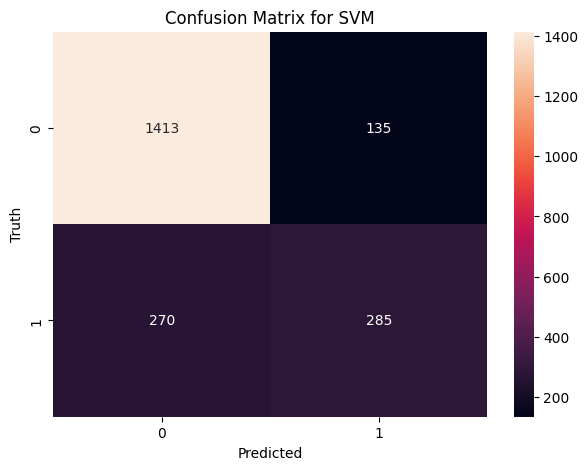

In [149]:
svm = SVC()
svm.fit(X_train, y_train)

# Cross-validation scores
svm_cv_scores = cross_val_score(svm, X_train, y_train, cv=5)
svm_avg_score = np.average(svm_cv_scores)

# Predictions and evaluation
y_pred_svm = svm.predict(X_test)
svm_classification_report = classification_report(y_test, y_pred_svm)
cm = confusion_matrix(y_test, y_pred_svm)

# Print results
print("SVM")
print("Cross-Validation Scores:", svm_cv_scores)
print("Average Cross-Validation Score:", svm_avg_score)
print("Classification Report:\n", svm_classification_report)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for SVM')
plt.show()
# Store results
results['Model'].append('SVM')
results['Avg Score'].append(svm_avg_score)


Decision Tree

Decision Tree
Cross-Validation Scores: [0.73523422 0.72403259 0.71865443 0.7196738  0.71049949]
Average Cross-Validation Score: 0.721618905850674
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1548
           1       0.48      0.51      0.50       555

    accuracy                           0.72      2103
   macro avg       0.65      0.66      0.65      2103
weighted avg       0.73      0.72      0.73      2103



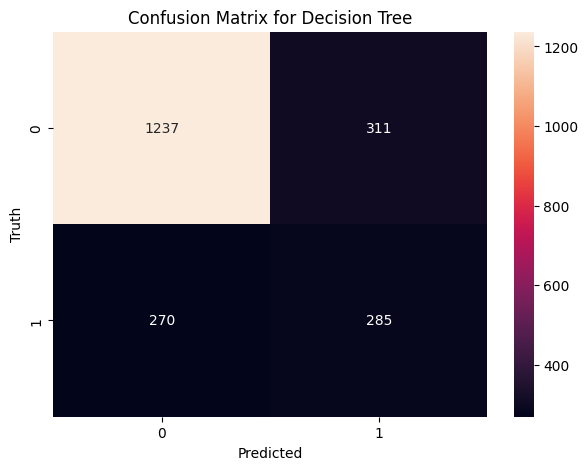

In [150]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Cross-validation scores
dt_cv_scores = cross_val_score(dt, X_train, y_train, cv=5)
dt_avg_score = np.average(dt_cv_scores)

# Predictions and evaluation
y_pred_dt = dt.predict(X_test)
dt_classification_report = classification_report(y_test, y_pred_dt)
cm = confusion_matrix(y_test, y_pred_dt)

print("Decision Tree")
print("Cross-Validation Scores:", dt_cv_scores)
print("Average Cross-Validation Score:", dt_avg_score)
print("Classification Report:\n", dt_classification_report)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Store results
results['Model'].append('Decision Tree')
results['Avg Score'].append(dt_avg_score)

Random Forest

Random Forest
Cross-Validation Scores: [0.78615071 0.77800407 0.78083588 0.79204893 0.7961264 ]
Average Cross-Validation Score: 0.7866331998397247
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1548
           1       0.62      0.53      0.57       555

    accuracy                           0.79      2103
   macro avg       0.73      0.71      0.72      2103
weighted avg       0.78      0.79      0.79      2103



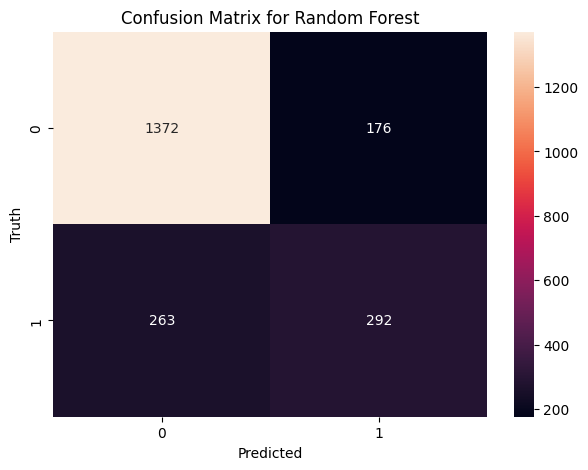

In [151]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Cross-validation scores
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
rf_avg_score = np.average(rf_cv_scores)

# Predictions and evaluation
y_pred_rf = rf.predict(X_test)
rf_classification_report = classification_report(y_test, y_pred_rf)
cm = confusion_matrix(y_test, y_pred_rf)

# Print results
print("Random Forest")
print("Cross-Validation Scores:", rf_cv_scores)
print("Average Cross-Validation Score:", rf_avg_score)
print("Classification Report:\n", rf_classification_report)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Store results
results['Model'].append('Random Forest')
results['Avg Score'].append(rf_avg_score)

KNN

KNN
Cross-Validation Scores: [0.74338086 0.75356415 0.73394495 0.74617737 0.72579001]
Average Cross-Validation Score: 0.7405714689072002
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      1548
           1       0.54      0.54      0.54       555

    accuracy                           0.76      2103
   macro avg       0.69      0.69      0.69      2103
weighted avg       0.76      0.76      0.76      2103



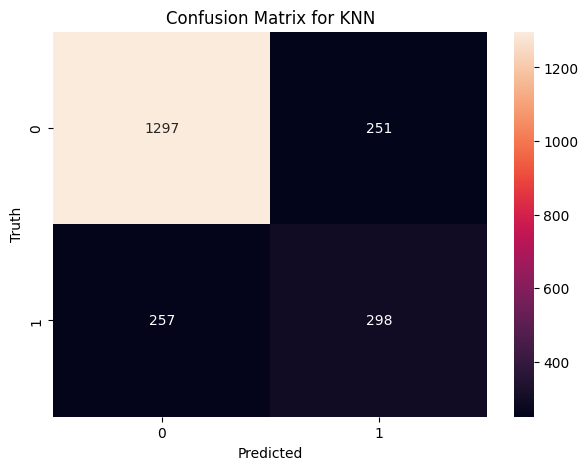

In [152]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Cross-validation scores
knn_cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
knn_avg_score = np.average(knn_cv_scores)

# Predictions and evaluation
y_pred_knn = knn.predict(X_test)
knn_classification_report = classification_report(y_test, y_pred_knn)
cm = confusion_matrix(y_test, y_pred_knn)

# Print results
print("KNN")
print("Cross-Validation Scores:", knn_cv_scores)
print("Average Cross-Validation Score:", knn_avg_score)
print("Classification Report:\n", knn_classification_report)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for KNN')
plt.show()

# Store results
results['Model'].append('KNN')
results['Avg Score'].append(knn_avg_score)

In [153]:
results_df = pd.DataFrame(results)
results_df

,Model,Avg Score
0,Logistic Regression,0.800491
1,SVM,0.789280
2,Decision Tree,0.721619
3,Random Forest,0.786633
4,KNN,0.740571


In our customer churn prediction, we evaluated four machine learning algorithms—Logistic Regression, SVM, Decision Tree, and KNN—finding that Logistic Regression yielded the highest average score of 0.800. This outcome underscores its effectiveness in forecasting customer churn based on demographic data, service usage, and contract details. Our approach included rigorous preprocessing to enhance data quality and model performance, while metrics like precision and recall provided insights into prediction accuracy.
So,Now we have to come out with some prevention stratagies using Logistic Regression Model

# **PREVENTION**

Import Libraries

In [154]:
import joblib

Load and Preprocess Data

In [155]:
# Load the data
data = pd.read_csv('/content/Telecom_cust_churn.csv')

# Convert 'TotalCharges' to numeric, coerce errors to handle non-numeric values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(0)

# Define features and target
features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
            'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
            'PaperlessBilling', 'PaymentMethod']

target = 'Churn'

# Preprocess the data
X = pd.get_dummies(data[features], drop_first=True)
y = data[target].apply(lambda x: 1 if x == 'Yes' else 0)

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Train the Logistic Regression Model

In [156]:
# Train the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Save the model and scaler
joblib.dump(lr, 'logistic_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X.columns, 'model_features.pkl')


['model_features.pkl']

Predict Churn Probabilities

In [157]:
# Load the trained logistic regression model and scaler
lr = joblib.load('logistic_regression_model.pkl')
scaler = joblib.load('scaler.pkl')
model_features = joblib.load('model_features.pkl')

# Predict churn probabilities using the logistic regression model
churn_probabilities = lr.predict_proba(X_test)[:, 1]

# Add churn probabilities to the dataframe
data.loc[X_test.index, 'ChurnProbability'] = churn_probabilities

Segment Customers Based on Risk and Value

In [159]:
# Define a threshold for high-risk customers
high_risk_threshold = 0.7

# Segment customers
data['RiskSegment'] = np.where(data['ChurnProbability'] > high_risk_threshold, 'High', 'Low')

# Calculate customer value (using TotalCharges as an example)
data['CustomerValue'] = data['TotalCharges'].astype(float)

# Define value segments
value_threshold = data['CustomerValue'].median()
data['ValueSegment'] = np.where(data['CustomerValue'] > value_threshold, 'High', 'Low')


 Apply Retention Strategies


In [160]:
# Define retention strategies based on segments
def apply_retention_strategy(row):
    if row['RiskSegment'] == 'High' and row['ValueSegment'] == 'High':
        return 'Offer Loyalty Rewards'
    elif row['RiskSegment'] == 'High' and row['ValueSegment'] == 'Low':
        return 'Offer Discounts'
    elif row['RiskSegment'] == 'Low' and row['ValueSegment'] == 'High':
        return 'Engagement Programs'
    else:
        return 'Standard Retention Efforts'

data['RetentionStrategy'] = data.apply(apply_retention_strategy, axis=1)

# Save the result
data.to_csv('churn_prevention_strategies.csv', index=False)


Visualization of Retention Strategies


RetentionStrategy
Engagement Programs           3509
Standard Retention Efforts    3407
Offer Discounts                115
Offer Loyalty Rewards           12
Name: count, dtype: int64


<ipython-input-161-a67edb01dcb8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='RetentionStrategy', palette='viridis')


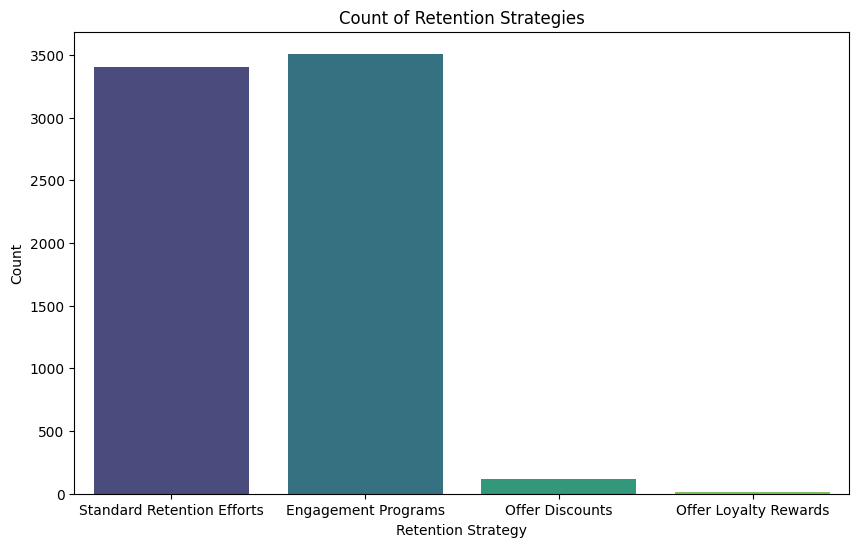

In [161]:
# Print summary of the retention strategies
print(data['RetentionStrategy'].value_counts())

# Visualization of retention strategies
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='RetentionStrategy', palette='viridis')
plt.title('Count of Retention Strategies')
plt.xlabel('Retention Strategy')
plt.ylabel('Count')
plt.show()

Visualization of Confusion Matrix

Turning predictive insights into actionable prevention strategies, we segmented customers by their churn risk and value. This segmentation facilitated tailored retention approaches, such as offering loyalty rewards to high-risk, high-value customers and implementing targeted discounts for those at risk but with lower value. Visualizing the effectiveness of these strategies underscored the importance of proactive engagement in mitigating churn. Moving forward, continual adaptation of these strategies based on real-time feedback will be critical in maintaining customer satisfaction and fostering lasting relationships, thereby enhancing overall retention rates and business sustainability.